In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from pathlib import Path
import camelot

In [2]:
pdf_path = "data/epa_scghg_report_draft_0.pdf"

In [3]:
tables = camelot.read_pdf(pdf_path, pages="87", flavor="stream")

In [23]:
df = tables[0].df.loc[4:].drop(labels=[5,6])

In [24]:
df

,0,1,2,3,4,5,6,7,8,9
4,,,SC-CO2,,,SC-CH4,,,SC-N2O,
7,,2.5%,2.0%,1.5%,2.5%,2.0%,1.5%,2.5%,2.0%,1.5%
8,Year,,,,,,,,,
9,2020,120,190,340,"1,300","1,600","2,300","35,000","54,000","87,000"
10,2030,140,230,380,"1,900","2,400","3,200","45,000","66,000","100,000"
11,2040,170,270,430,"2,700","3,300","4,200","55,000","79,000","120,000"
12,2050,200,310,480,"3,500","4,200","5,300","66,000","93,000","140,000"
13,2060,230,350,530,"4,300","5,100","6,300","76,000","110,000","150,000"
14,2070,260,380,570,"5,000","5,900","7,200","85,000","120,000","170,000"
15,2080,280,410,600,"5,800","6,800","8,200","95,000","130,000","180,000"


In [25]:
dcr_list = [2.5, 2, 1.5]
emit_list = ["CO2", "CH4", "N2O"]

In [26]:
df = df.set_index(0)

In [27]:
df.columns = pd.MultiIndex.from_product([emit_list, dcr_list])

In [28]:
df = df.reset_index().drop(labels=[0,1,2]).set_index(0)

In [29]:
df.index.name = 't'

In [30]:
df

CO2              CH4                   N2O                  
      2.5  2.0  1.5    2.5    2.0    1.5     2.5      2.0      1.5
t                                                                 
2020  120  190  340  1,300  1,600  2,300  35,000   54,000   87,000
2030  140  230  380  1,900  2,400  3,200  45,000   66,000  100,000
2040  170  270  430  2,700  3,300  4,200  55,000   79,000  120,000
2050  200  310  480  3,500  4,200  5,300  66,000   93,000  140,000
2060  230  350  530  4,300  5,100  6,300  76,000  110,000  150,000
2070  260  380  570  5,000  5,900  7,200  85,000  120,000  170,000
2080  280  410  600  5,800  6,800  8,200  95,000  130,000  180,000

In [31]:
df = df.replace(to_replace=',', value='', regex=True)

In [32]:
df = df.unstack().to_frame().reset_index()
df.columns = ['eall','dr','t','Value']

In [33]:
df

,eall,dr,t,Value
0,CO2,2.5,2020,120
1,CO2,2.5,2030,140
2,CO2,2.5,2040,170
3,CO2,2.5,2050,200
4,CO2,2.5,2060,230
...,...,...,...,...
58,N2O,1.5,2040,120000
59,N2O,1.5,2050,140000
60,N2O,1.5,2060,150000
61,N2O,1.5,2070,170000


In [34]:
scenarios = os.listdir('results/fy25')



In [35]:
files_list = glob('results/fy25/*/emit_irt.csv')

In [36]:
scenarios

['CP_LowTrans_HighDC',
 'CP_LowTrans_HighDC_CES_NoIRA',
 'CP_LowTrans_HighDC_NoIRA',
 'CP_LowTrans_HighDC_OBBBA',
 'CP_LowTrans_LowDC',
 'CP_LowTrans_LowDC_CES_NoIRA',
 'CP_LowTrans_LowDC_NoIRA',
 'CP_LowTrans_LowDC_OBBBA',
 'CP_MidTrans_HighDC_95by2050_DLY',
 'CP_MidTrans_HighDC_CES_NoIRA',
 'CP_MidTrans_HighDC_NoIRA',
 'CP_MidTrans_LowDC_95by2050',
 'CP_MidTrans_LowDC_95by2050_DLY',
 'CP_MidTrans_LowDC_CES_NoIRA',
 'CP_MidTrans_LowDC_NoIRA',
 'ELC_LowTrans_HighDC_CES_NoIRA',
 'ELC_LowTrans_LowDC_CES_NoIRA',
 'ELC_MidTrans_HighDC_CES',
 'ELC_MidTrans_HighDC_CES_NoIRA',
 'ELC_MidTrans_HighDC_NoIRA',
 'ELC_MidTrans_LowDC_CES_NoIRA',
 'ELC_MidTrans_LowDC_NoIRA',
 'FINAL_CP_LowTrans_HighDC',
 'FINAL_CP_LowTrans_HighDC_OBBBA',
 'FINAL_CP_LowTrans_LowDC_OBBBA',
 'FINAL_CP_LowTrans_NoDC_OBBBA',
 'FINAL_CP_MidTrans_LowDC_95by2050',
 'FINAL_LA_NoGas_MidTrans_HighDC_OBBBA',
 'FINAL_LA_NoGas_MidTrans_LowDC_OBBBA',
 'FINAL_ST_CO2_MidTrans_HighDC',
 'FINAL_ST_CO2_MidTrans_HighDC_OBBBA',
 'FINAL_ST

In [31]:
for i, scenario in enumerate(scenarios):
    emit_irt_path = Path(f'results/fy25/{scenario}/emit_irt.csv')
    try:
        temp_file = pd.read_csv(emit_irt_path)
    except FileNotFoundError:
        print(f"File not found: {emit_irt_path}")
        continue
    df = temp_file.drop(columns=['i']).groupby(['eall', 't']).sum().reset_index()
    scc = pd.read_excel("data/scc_mult.xlsx")
    # Ensure column names are consistent (case-insensitive match)
    scc['eall'] = scc['eall'].ffill().str.upper()
    # Merge on 'eall' and 't' columns
    merged = pd.merge(
        df,
        scc,
        on=['eall', 't'],
        suffixes=('_emit', '_scc')
    )
    # Multiply the values
    merged['product'] = merged['Value_emit'] * merged['Value_scc']
    # Output the result
    scc_path = Path(f'results/fy25/{scenario}/scc_values.csv')
    merged.to_csv(scc_path, index=False)



File not found: results\fy25\ELC_MidTrans_HighDC_NoIRA\emit_irt.csv
File not found: results\fy25\ELC_MidTrans_LowDC_NoIRA\emit_irt.csv
File not found: results\fy25\TEST_LA_CO2_MidTrans_HighDC_NoIRA\emit_irt.csv


In [37]:
ex_file = pd.read_csv(files_list[0])
ex_file.head()

,eall,i,r,t,Value
0,CO2,biopower,p1,2010,841.765219
1,CO2,biopower,p3,2010,3503.640307
2,CO2,biopower,p3,2015,942.978960
3,CO2,biopower,p3,2020,942.978960
4,CO2,biopower,p3,2023,942.978960


In [39]:
exdf = ex_file.drop(columns=['i']).groupby(['eall','r','t']).sum().reset_index()

In [48]:
df['t'] = df['t'].astype('int')
df['Value'] = df['Value'].astype('float')
df['dr'] = df['dr'].astype('float')

In [52]:
import seaborn as sns

<Axes: xlabel='t', ylabel='Value'>

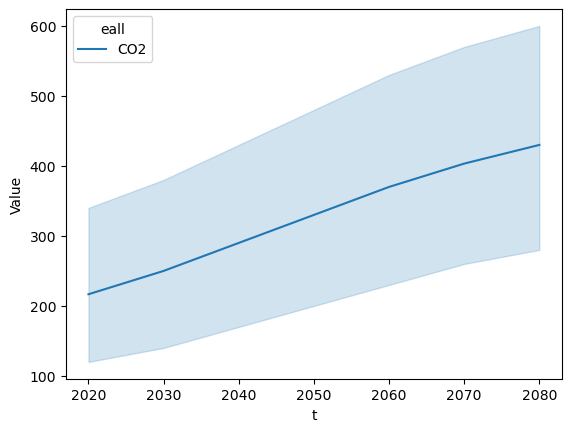

In [ ]:
sns.lineplot(df.loc[df['eall']=='CO2'], x='t',y='Value', hue='eall')

In [58]:
df['t'] = pd.to_datetime(df['t'], format='%Y')

In [64]:
df.set_index(['t','eall','dr'])

,,,Value
t,eall,dr,
2020-01-01,CO2,2.5,120.0
2030-01-01,CO2,2.5,140.0
2040-01-01,CO2,2.5,170.0
2050-01-01,CO2,2.5,200.0
2060-01-01,CO2,2.5,230.0
...,...,...,...
2040-01-01,N2O,1.5,120000.0
2050-01-01,N2O,1.5,140000.0
2060-01-01,N2O,1.5,150000.0


In [65]:
emit_list

['CO2', 'CH4', 'N2O']

In [66]:
dcr_list

[2.5, 2, 1.5]

In [80]:
test_df = df.loc[((df['eall']=='CO2') & (df['dr']==1.5))]

In [81]:
test_df

,eall,dr,t,Value
14,CO2,1.5,2020-01-01,340.0
15,CO2,1.5,2030-01-01,380.0
16,CO2,1.5,2040-01-01,430.0
17,CO2,1.5,2050-01-01,480.0
18,CO2,1.5,2060-01-01,530.0
19,CO2,1.5,2070-01-01,570.0
20,CO2,1.5,2080-01-01,600.0


In [94]:
test_df.set_index('t').drop(columns=['eall','dr']).resample("YE").mean().interpolate().assign(eall='CO2',dr=1.5)

,Value,eall,dr
t,,,
2020-12-31,340.0,CO2,1.5
2021-12-31,344.0,CO2,1.5
2022-12-31,348.0,CO2,1.5
2023-12-31,352.0,CO2,1.5
2024-12-31,356.0,CO2,1.5
...,...,...,...
2076-12-31,588.0,CO2,1.5
2077-12-31,591.0,CO2,1.5
2078-12-31,594.0,CO2,1.5


In [97]:
frames = []
for e in emit_list:
    for dr in dcr_list:
        sub_df = df.loc[((df['eall']==e) & (df['dr']==dr)),:]
        sub_df = sub_df.set_index('t')
        sub_df = sub_df[['Value']].resample('YE').mean().interpolate(how='linear').assign(eall=e, dr=dr)
        sub_df = sub_df.reset_index(drop=False)
        sub_df['t'] = sub_df['t'].dt.year
        # display(sub_df)
        frames.append(sub_df)

In [99]:
full_df = pd.concat(frames)

In [103]:
full_df

,t,Value,eall,dr
0,2020,120.0,CO2,2.5
1,2021,122.0,CO2,2.5
2,2022,124.0,CO2,2.5
3,2023,126.0,CO2,2.5
4,2024,128.0,CO2,2.5
...,...,...,...,...
56,2076,176000.0,N2O,1.5
57,2077,177000.0,N2O,1.5
58,2078,178000.0,N2O,1.5
59,2079,179000.0,N2O,1.5


In [100]:
pd.merge(exdf, full_df, on=['t','eall'])

,eall,r,t,Value_x,Value_y,dr
0,CH4,p1,2020,469555.535016,1300.0,2.5
1,CH4,p1,2020,469555.535016,1600.0,2.0
2,CH4,p1,2020,469555.535016,2300.0,1.5
3,CH4,p1,2023,225601.573111,1480.0,2.5
4,CH4,p1,2023,225601.573111,1840.0,2.0
...,...,...,...,...,...,...
12586,N2O,z122,2047,111285.169105,88800.0,2.0
12587,N2O,z122,2047,111285.169105,134000.0,1.5
12588,N2O,z122,2050,97233.791096,66000.0,2.5
12589,N2O,z122,2050,97233.791096,93000.0,2.0


In [40]:
df

,eall,dr,t,Value
0,CO2,2.5,2020,120
1,CO2,2.5,2030,140
2,CO2,2.5,2040,170
3,CO2,2.5,2050,200
4,CO2,2.5,2060,230
...,...,...,...,...
58,N2O,1.5,2040,120000
59,N2O,1.5,2050,140000
60,N2O,1.5,2060,150000
61,N2O,1.5,2070,170000


In [14]:
scc = pd.read_excel("data/scc_mult.xlsx")


In [ ]:
# Ensure column names are consistent (case-insensitive match)
scc['eall'] = scc['eall'].ffill().str.upper()
# Merge on 'eall' and 't' columns
merged = pd.merge(
    df,
    scc,
    on=['eall', 't'],
    suffixes=('_emit', '_scc')
)
# Multiply the values
merged['product'] = merged['Value_emit'] * merged['Value_scc']


In [16]:
merged

,eall,r,t,Value_emit,Value_scc
0,CH4,p1,2010,379159.375093,800
1,CH4,p1,2015,153947.716824,1200
2,CH4,p1,2020,469555.535016,1600
3,CH4,p1,2023,225601.573111,1840
4,CH4,p1,2026,437163.347902,2080
...,...,...,...,...,...
4953,N2O,z122,2038,156073.151009,76400
4954,N2O,z122,2041,153442.125717,80400
4955,N2O,z122,2044,145725.467786,84600
4956,N2O,z122,2047,111285.169105,88800


In [17]:
scc['eall'].ffill()

0     CO2
1     CO2
2     CO2
3     CO2
4     CO2
5     CO2
6     CO2
7     CO2
8     CO2
9     CO2
10    CO2
11    CO2
12    CO2
13    CH4
14    CH4
15    CH4
16    CH4
17    CH4
18    CH4
19    CH4
20    CH4
21    CH4
22    CH4
23    CH4
24    CH4
25    CH4
26    N2O
27    N2O
28    N2O
29    N2O
30    N2O
31    N2O
32    N2O
33    N2O
34    N2O
35    N2O
36    N2O
37    N2O
38    N2O
Name: eall, dtype: object

In [18]:
df['t'].unique()

array([2010, 2015, 2020, 2023, 2026, 2029, 2032, 2035, 2038, 2041, 2044,
       2047, 2050])

In [19]:
scc['t'].unique()

array([2010, 2015, 2020, 2023, 2026, 2029, 2032, 2035, 2038, 2041, 2044,
       2047, 2050])

In [29]:

# Multiply the values
merged['product'] = merged['Value_emit'] * merged['Value_scc']


In [30]:
# Output the result
merged.to_csv('scc_values.csv', index=False)